In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "first"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,error,finished,time_minutes,1,2,3,4,5,6
0,2.403478,False,32.386642,112.980719,660.290492,714.849879,949.376778,1959.483058,2780.965652
1,1.855209,False,30.721941,110.419791,676.108107,732.917585,991.447667,1912.413372,2749.814700
2,0.985724,True,12.420635,109.976480,640.395667,698.374538,1017.877426,1932.859957,2723.479643
3,1.195090,False,34.650623,109.654083,650.125053,717.940521,992.943953,1850.264346,2722.642451
4,0.845875,True,9.947178,110.222916,653.970547,721.803550,1042.193793,1954.836097,2725.505979


In [3]:
data.describe()

,error,time_minutes,1,2,3,4,5,6
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.310204,27.591638,110.532627,651.599202,715.066224,1006.367433,1934.425864,2735.745510
std,0.453445,6.608646,2.167161,13.825042,11.416067,17.274309,35.000879,38.687696
min,0.574692,9.524698,103.788086,607.825209,693.879595,949.376778,1833.414517,2628.125725
25%,0.991040,25.540307,109.297419,646.895865,706.711940,999.664234,1923.271952,2715.208749
50%,1.202902,29.491869,110.168344,652.619700,715.527452,1010.533312,1941.469477,2727.044953
75%,1.520265,32.284413,111.531649,659.322373,722.191488,1014.632511,1958.337009,2749.676626
max,2.805507,36.241435,115.998648,684.613271,745.644051,1042.193793,1995.001339,2861.408033


### Natural frequencies

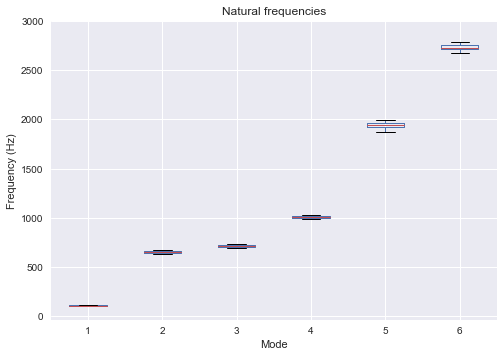

In [4]:
freq = data.drop(['error', 'finished', 'time_minutes'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

### Solution times and final errors

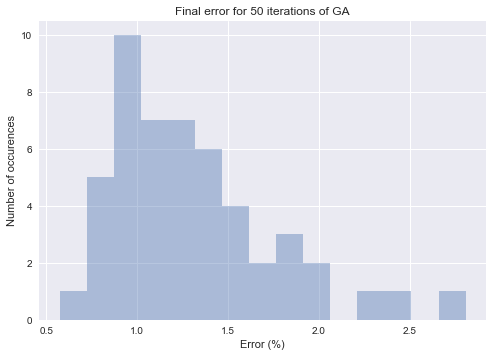

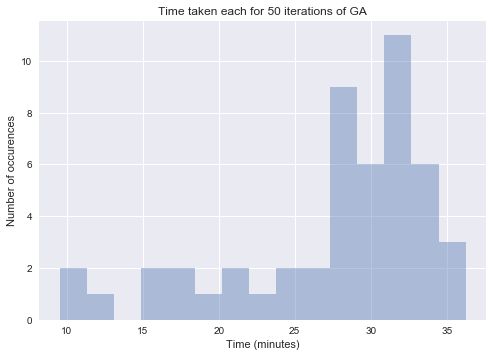

In [5]:
ax = sns.distplot(data['error'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="Error (%)", ylabel="Number of occurences", title="Final error for 50 iterations of GA")
plt.show()

ax = sns.distplot(data['time_minutes'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="Time (minutes)", ylabel="Number of occurences", title="Time taken each for 50 iterations of GA")
plt.show()

### Grouping by finish time

In [6]:
print(data['finished'].value_counts().to_string())

False    36
True     14


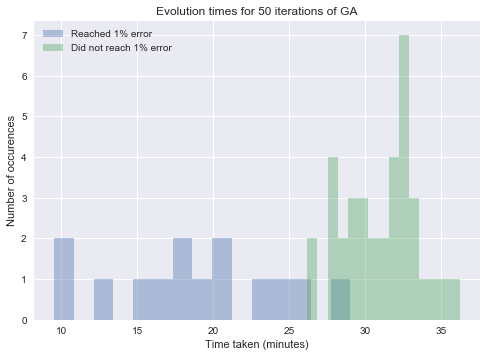

In [7]:
ax = sns.distplot(data['time_minutes'].loc[data['finished']], bins=15, kde=False, norm_hist=False, label="Reached 1% error")
sns.distplot(data['time_minutes'].loc[-data['finished']], bins=15, kde=False, norm_hist=False, label="Did not reach 1% error")
ax.set(xlabel="Time taken (minutes)", ylabel="Number of occurences", title="Evolution times for 50 iterations of GA")
plt.legend()
plt.show()